In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
missing_values_sum = df.isnull().sum()
print(missing_values_sum)
missing_values_pct = (df.isnull().mean()*100).sort_values(ascending = False)
print(missing_values_pct)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
import missingno as msno

<AxesSubplot:>

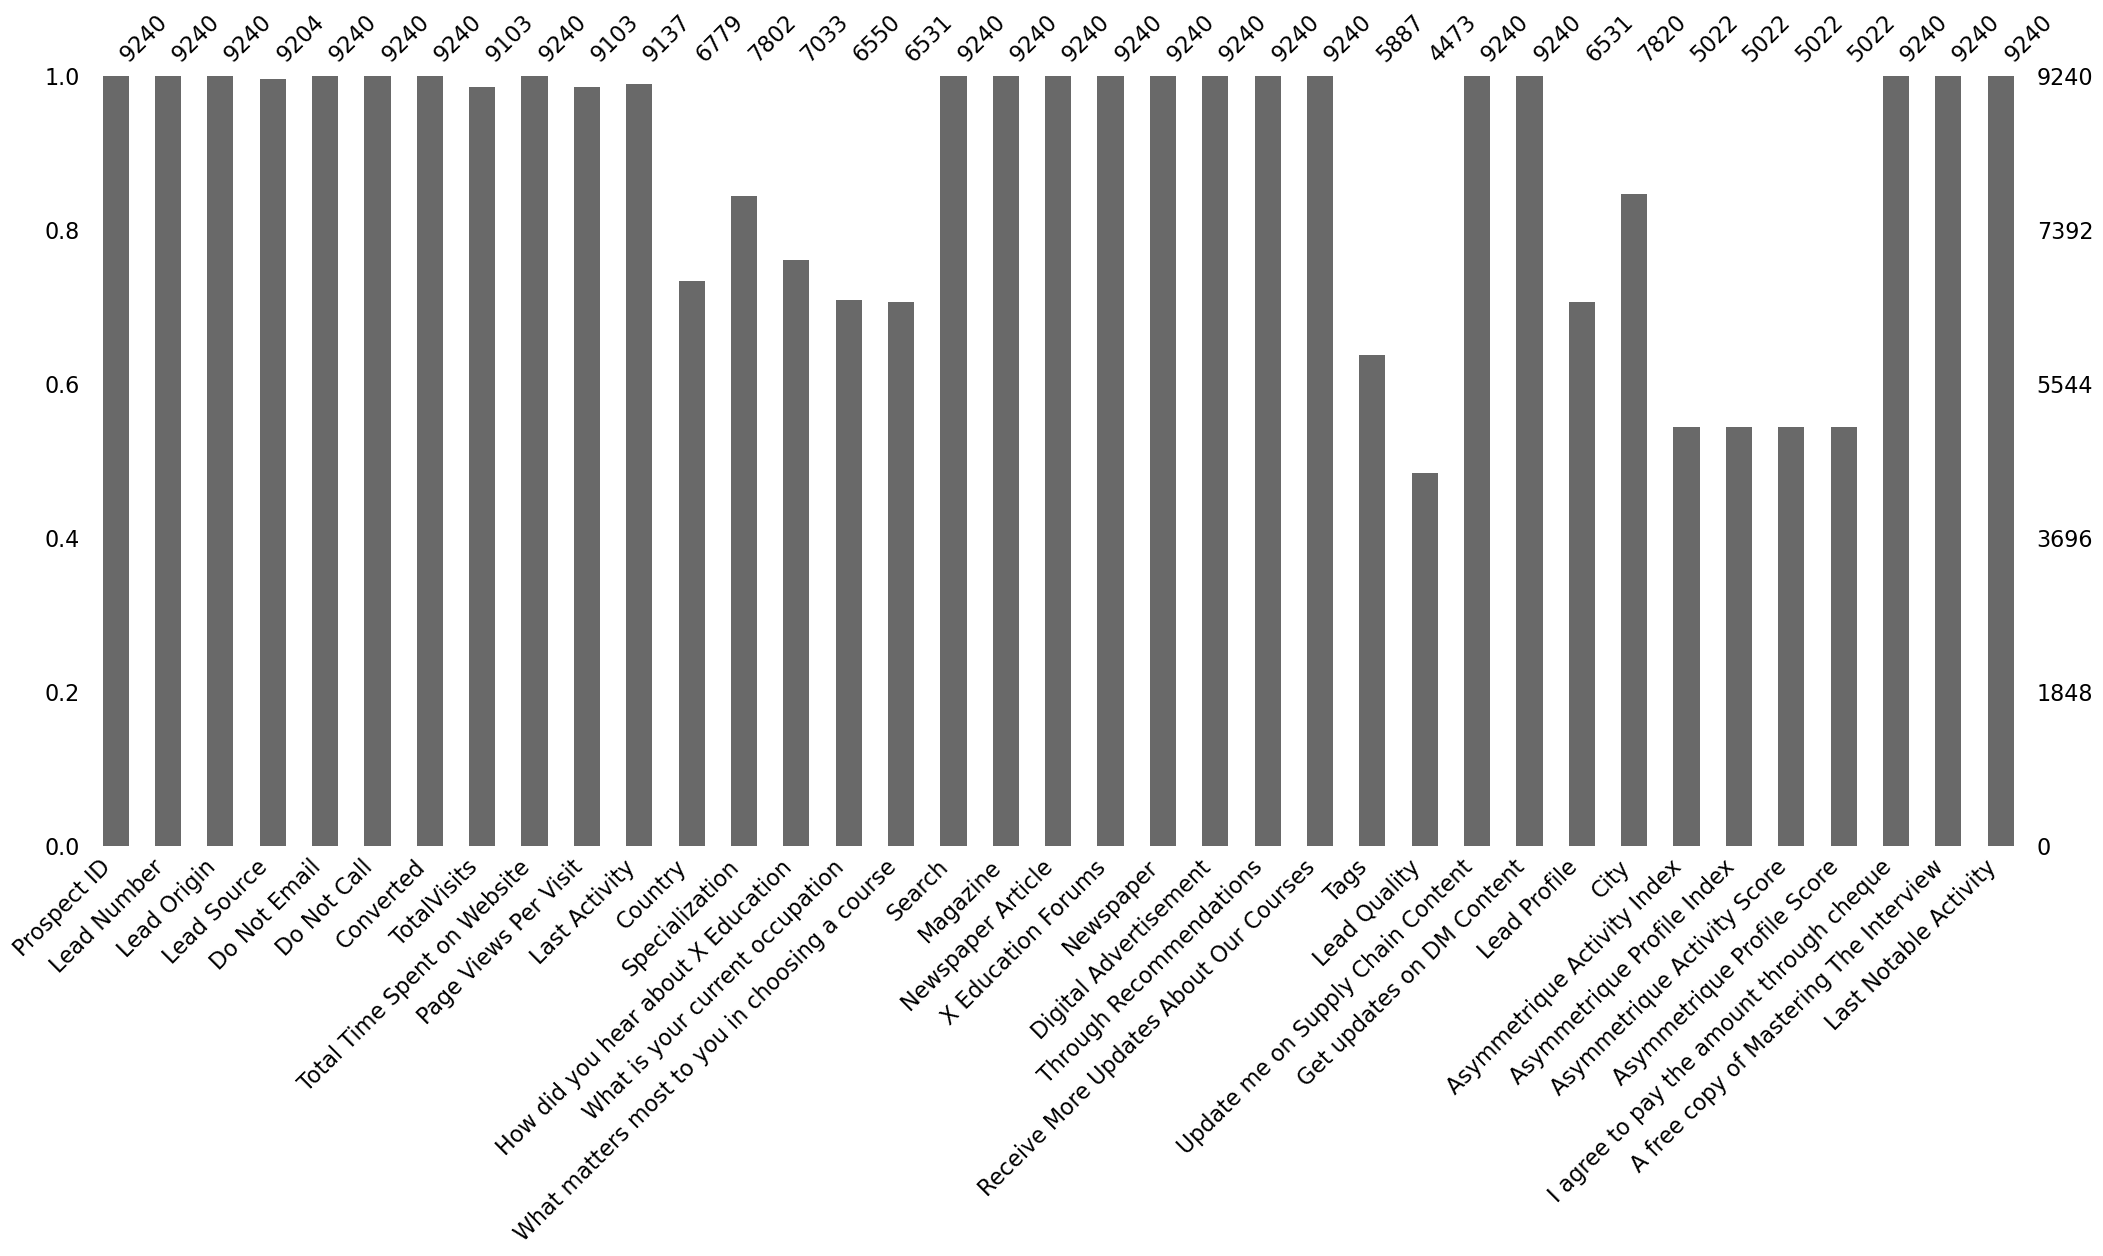

In [7]:
msno.bar(df)

In [8]:
# replacing custome with nan

df = df.replace('Custom', np.nan)

In [9]:
# checking for missing values
missing_values_pct = (df.isnull().mean()*100).sort_values(ascending = False)
print(missing_values_pct)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

We found some columns with very high null values. Thus we will drop the columns with null value percentage higher than 35%

In [10]:
df1 = df.drop(['How did you hear about X Education', 'Lead Profile','Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
              'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'City', 'Specialization', 'Tags'], axis = 1)

In [11]:
df1.shape

(9240, 27)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Categorical Attribute Analysis

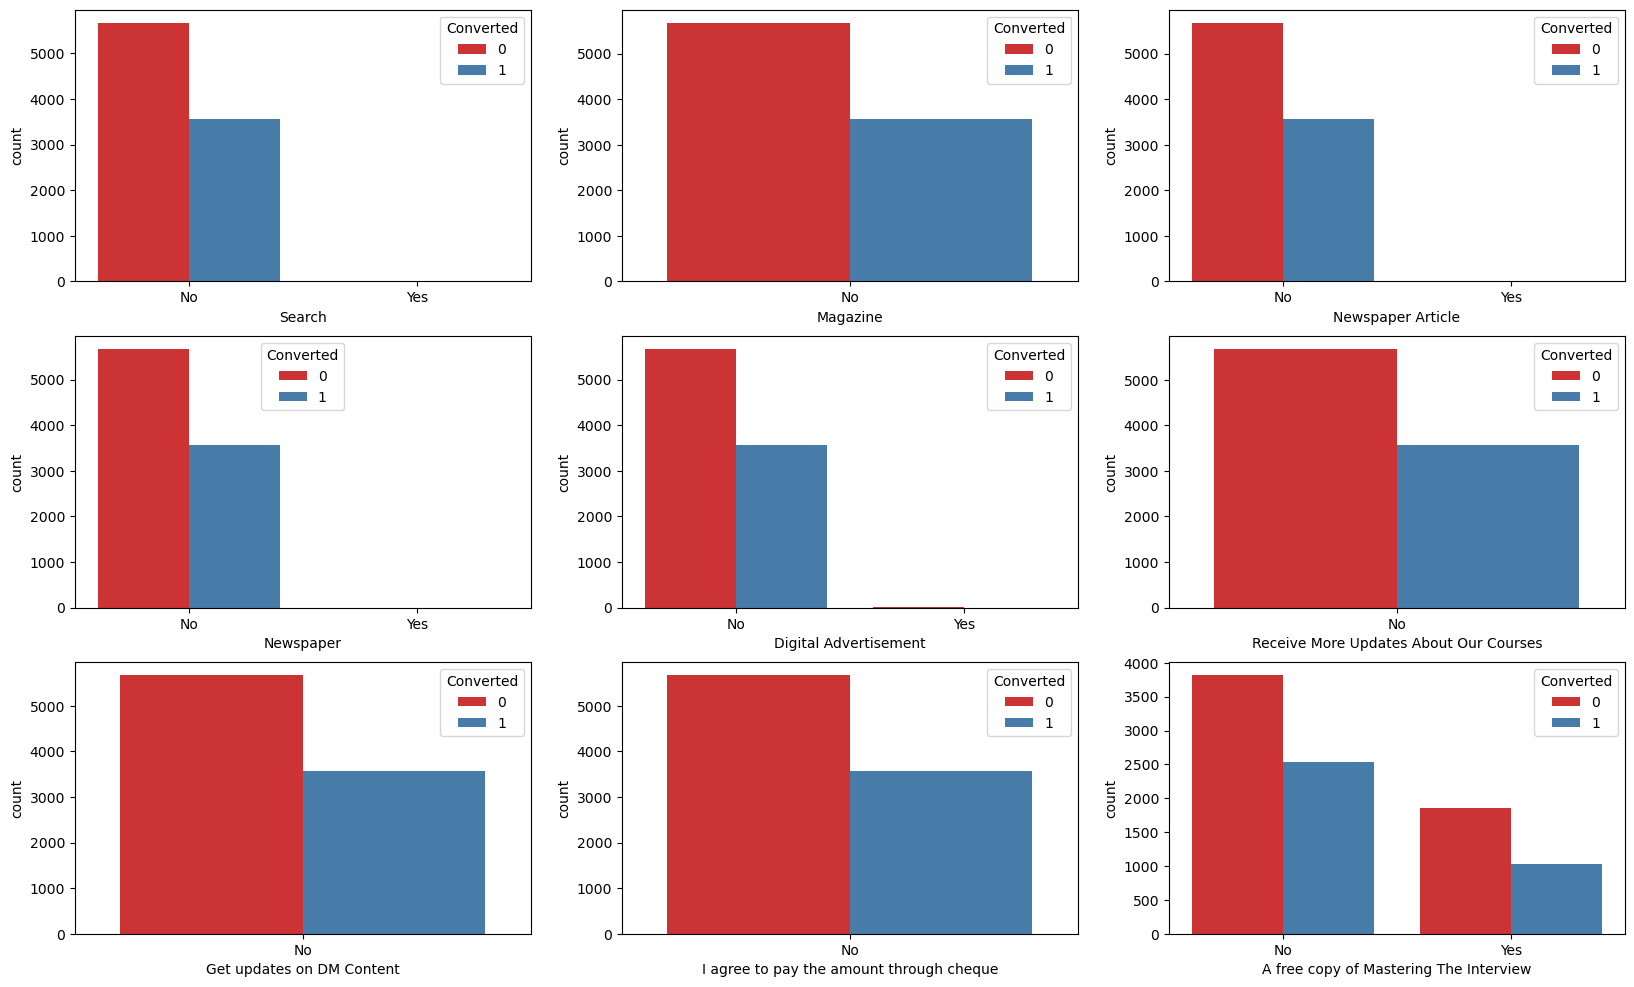

In [13]:

#Visualizing variables for imbalance

fig, axs = plt.subplots(3,3,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = df1, ax = axs[0,0],palette = 'Set1')
sns.countplot(x = "Magazine", hue = "Converted", data = df1, ax = axs[0,1],palette = 'Set1')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df1, ax = axs[0,2],palette = 'Set1')
sns.countplot(x = "Newspaper", hue = "Converted", data = df1, ax = axs[1,0],palette = 'Set1')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df1, ax = axs[1,1],palette = 'Set1')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df1, ax = axs[1,2],palette = 'Set1')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df1, ax = axs[2,0],palette = 'Set1')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df1, ax = axs[2,1],palette = 'Set1')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df1, ax = axs[2,2],palette = 'Set1')
plt.show()

Among all these columns except 'A free copy of Mastering The Interview' data is highly imbalanced, thus we will drop them.


In [14]:
#creating a list of columns to be dropped

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

In [15]:
df1['Lead Source']. value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Google is having the highest number of occurences hence we will replace null valuez with google.

In [16]:
#replacing Nan Value with Google
df1['Lead Source'] = df1['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
df1['Lead Source'] = df1['Lead Source'].replace('google','Google')

In [17]:
#combining low frequency values to Others

df1['Lead Source'] = df1['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

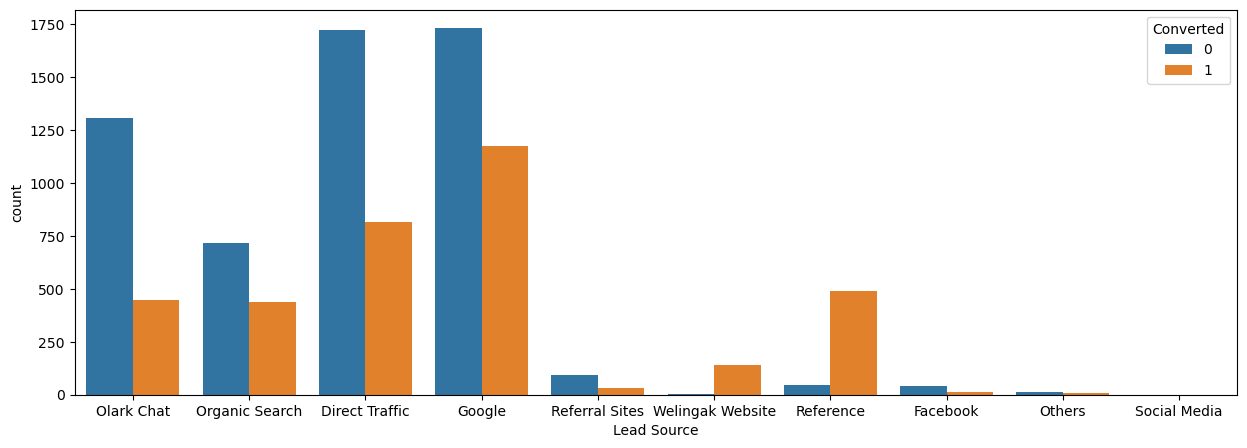

In [18]:
# visualizing the counts of Lead Source Variables

plt.figure(figsize=(15,5))

sns.countplot(x = 'Lead Source', hue = 'Converted', data = df1)
plt.show()



- Maximum Leads are generated by Google and Direct Traffic.


In [19]:
df1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [20]:
# visualize country counts

df1['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

Since the count of null is high we will replace it with 'Un available'

In [21]:
df1['Country'] = df1['Country'].replace(np.nan,'Un available')

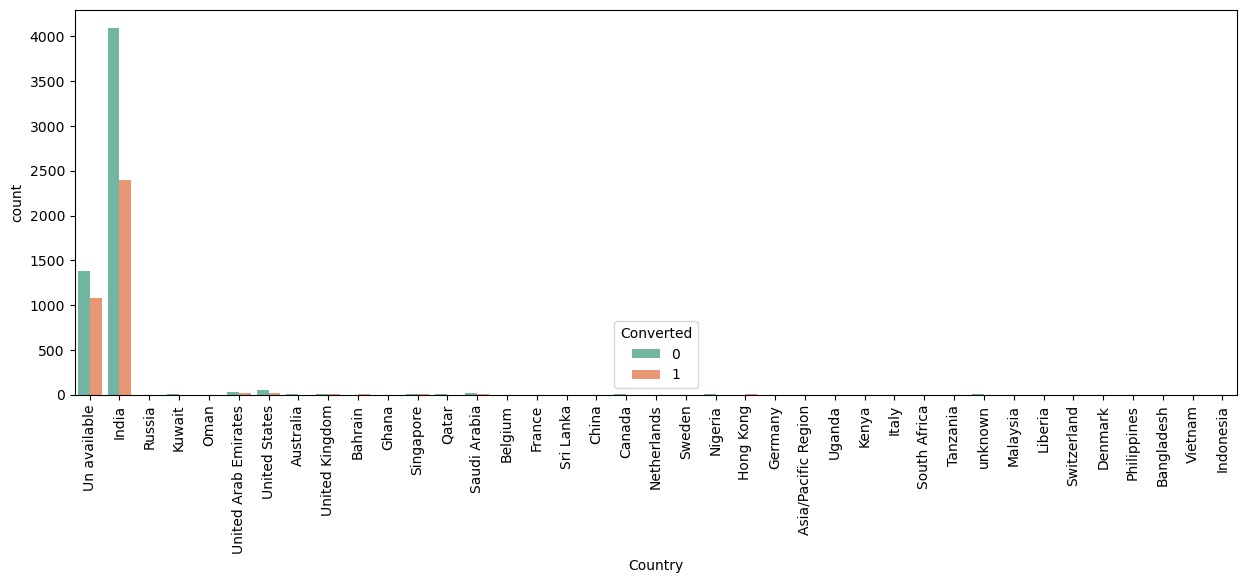

In [22]:
# visualizing country counts
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =df1 , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

As we can see most of the data is from India, we cannot draw any inference from this. so, we drop this column

In [23]:
# columns to be dropped

cols_to_drop.append('Country')

cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

In [24]:
#checking value counts of 'What is your current occupation' column
df1['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Since no information has been provided regarding occupation, we can replace missing values with new category 'Un available'

In [25]:
#Creating new category 'Un available'

df1['What is your current occupation'] = df1['What is your current occupation'].replace(np.nan, 'Un available')

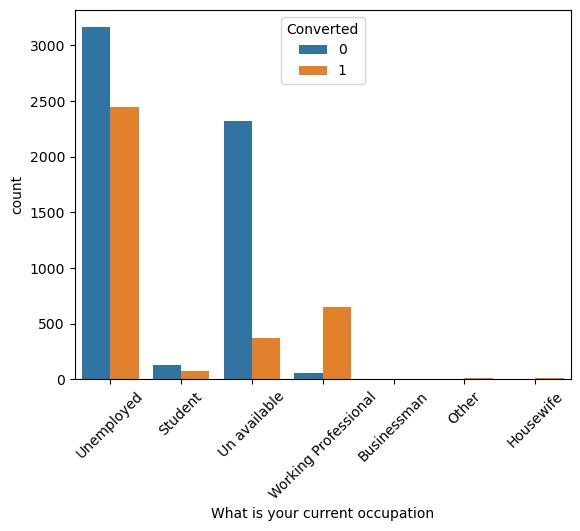

In [26]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = df1)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Inference

Maximum leads generated are unemployed and their conversion rate is more than 50%.
Conversion rate of working professionals is very high.

In [27]:
#checking value counts of 'What matters most to you in choosing a course'

df1['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Clearly seen that missing values in the this column can be imputed by 'Better Career Aspects'

In [28]:
df1['What matters most to you in choosing a course'] = df1['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Aspects')

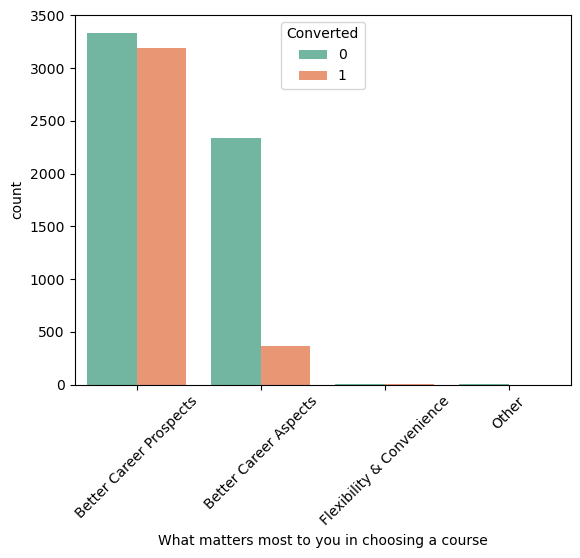

In [29]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = df1 , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Inference
This column spread of variance is very low , hence it can be dropped.

In [30]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

In [31]:
#checking value counts of Last Activity
df1['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Missing values can be imputed with mode value "Email Opened"

In [32]:
#replacing Nan Values with mode value "Email Opened"

df1['Last Activity'] = df1['Last Activity'].replace(np.nan,'Email Opened')

In [33]:
#combining low frequency values
df1['Last Activity'] = df1['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

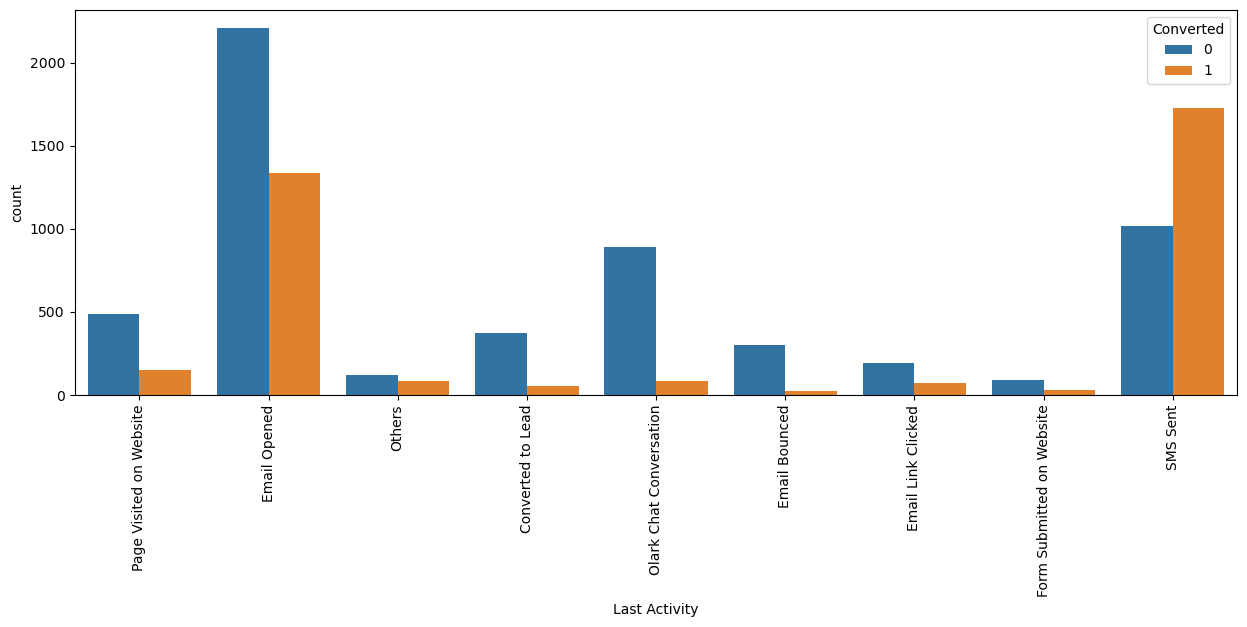

In [34]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = df1)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference

Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
SMS sent as last acitivity has high conversion rate

In [35]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_to_drop.append('Last Activity')

cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [36]:
#Check the Null Values in All Columns after imputation:

df1.isnull().mean()*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    0.000000
Country                                          0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

In [37]:
# Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
df1 = df1.dropna()

In [38]:
df1.shape

(9103, 27)

In [39]:
df1.isnull().mean()*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

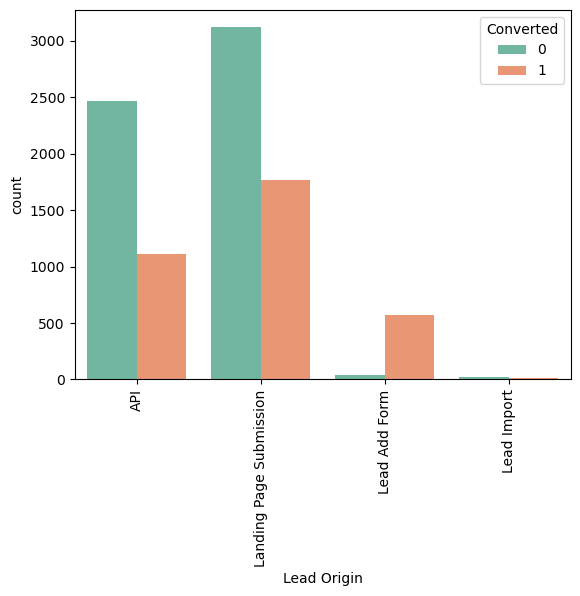

In [40]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = df1 , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

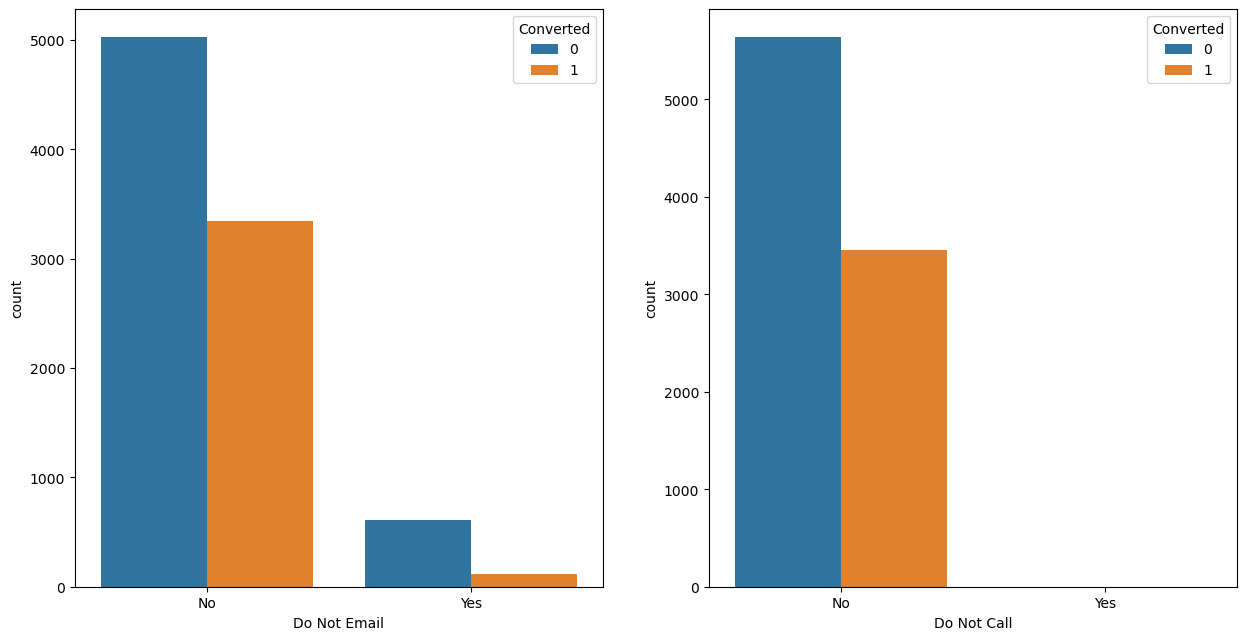

In [41]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df1, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df1, ax = axs[1])
plt.show()

We Can append the Do Not Call Column to the list of Columns to be Dropped data is higjly skewed

In [42]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call']

In [43]:
#checking value counts of last Notable Activity
df1['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [44]:
#clubbing lower frequency values

df1['Last Notable Activity'] = df1['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

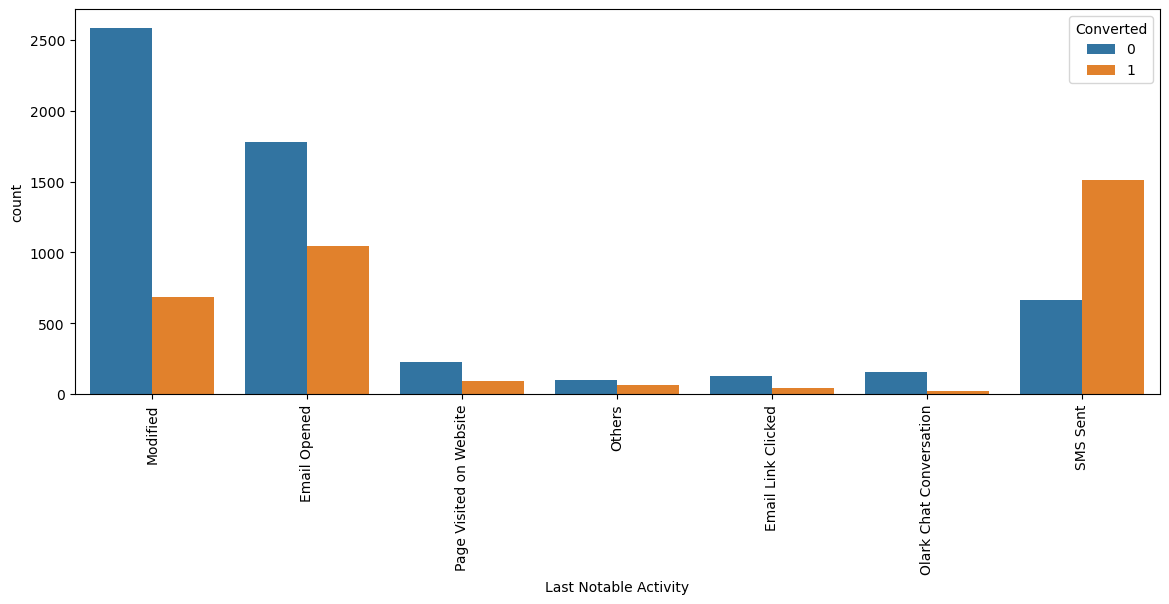

In [45]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

Inference

Maximum leads are generated having last activity as Email opened but conversion rate is not too good. SMS sent as last acitivity has high conversion rate

In [46]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
cols_to_drop.append('Last Notable Activity')

cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [47]:
#dropping columns
df2 = df1.drop(cols_to_drop,1)

#checking info of dataset for remaining columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9103 non-null   object 
 1   Lead Number                      9103 non-null   int64  
 2   Lead Origin                      9103 non-null   object 
 3   Lead Source                      9103 non-null   object 
 4   Do Not Email                     9103 non-null   object 
 5   Converted                        9103 non-null   int64  
 6   TotalVisits                      9103 non-null   float64
 7   Total Time Spent on Website      9103 non-null   int64  
 8   Page Views Per Visit             9103 non-null   float64
 9   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 782.3+ KB


C:\Users\lenovo\AppData\Local\Temp\ipykernel_8244\3539963827.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df1.drop(cols_to_drop,1)


In [48]:
df2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


In [49]:
df2.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


In [50]:
df2 = df2.drop(['Prospect ID','Lead Number'], axis = 1)

df2.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


# Numerical Attribute Analysis

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


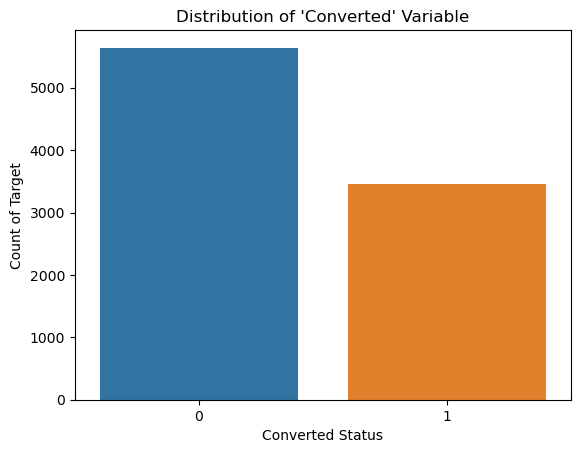

In [51]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
sns.countplot(df2.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [52]:
# checking conversion rate

converted = (sum(df2['Converted'])/len(df2['Converted'].index))*100
converted

38.02043282434362

Currently, lead Conversion rate is 38% only

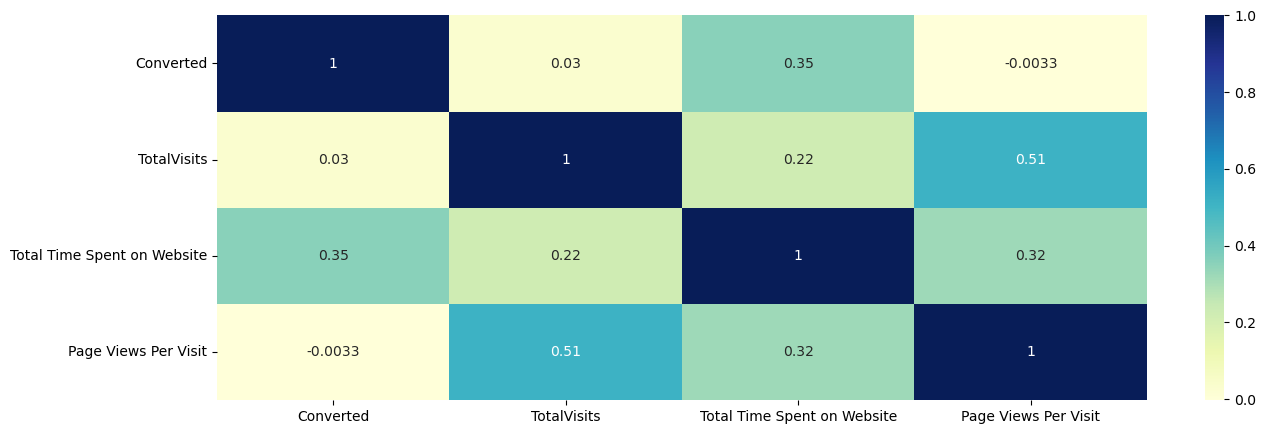

In [53]:
#checking coorelation of numeric variables by heatmap

plt.figure(figsize=(15,5))

sns.heatmap(df2.corr(), cmap='YlGnBu' , annot = True)
plt.show()

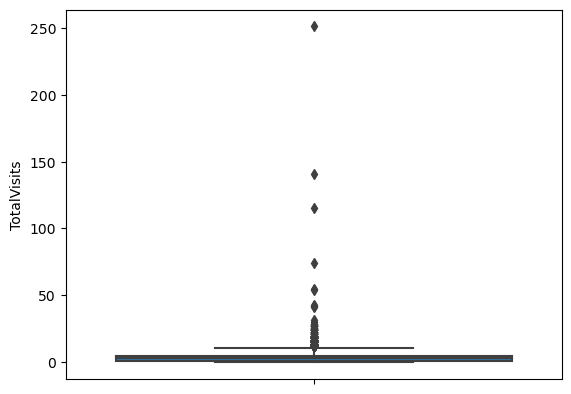

In [54]:
#visualizing spread of variable Total Visits

sns.boxplot(y=df2['TotalVisits'])
plt.show()

In [55]:
#checking percentile values

df2['TotalVisits'].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8244\2398713115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalVisits'][df2['TotalVisits'] <= percentiles[0]] = percentiles[0]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8244\2398713115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalVisits'][df2['TotalVisits'] >= percentiles[1]] = percentiles[1]


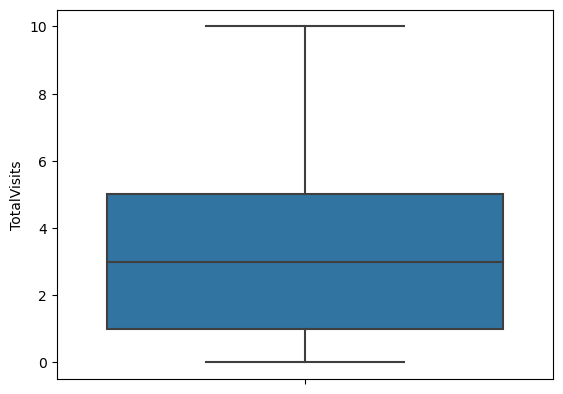

In [56]:
#capping the outlier to 95% value for analysis

percentiles = df2['TotalVisits'].quantile([0.05,0.95]).values
df2['TotalVisits'][df2['TotalVisits'] <= percentiles[0]] = percentiles[0]
df2['TotalVisits'][df2['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=df2['TotalVisits'])
plt.show()

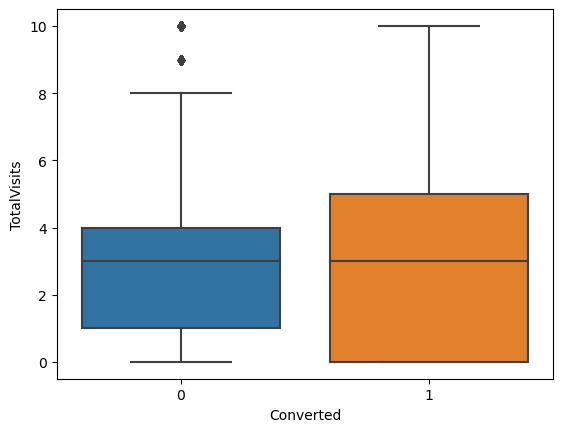

In [57]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df2)
plt.show()

Inference

As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

In [58]:
#checking percentiles for "Total Time Spent on Website"

df2['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

Since there are no major outliers for the above variable, outlier treatment is not required for it

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

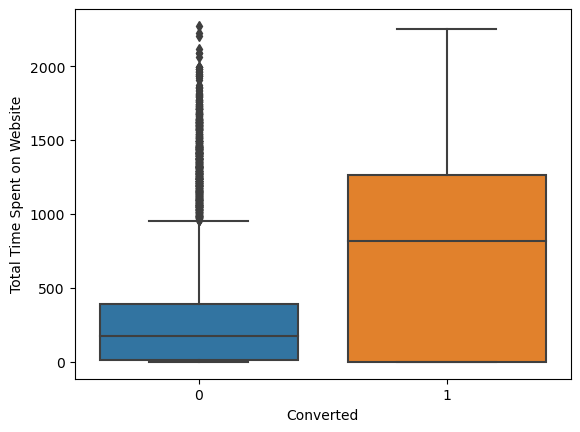

In [59]:
# visualising 'Total Time Spent on Website' w.r.t the target vatriable 'converted'

sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df2)

Inference

As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate

In [60]:
df2['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

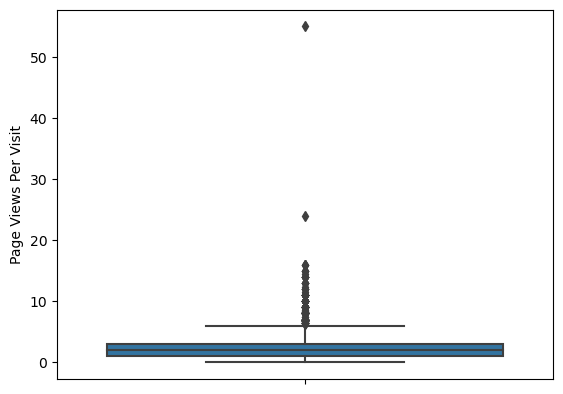

In [61]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =df2['Page Views Per Visit'])
plt.show()

Presence of outliers can be clearly seen in the above boxplot, thus outlier treatment need to be done for this variable

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8244\1286437601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Page Views Per Visit'][df2['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8244\1286437601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Page Views Per Visit'][df2['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]


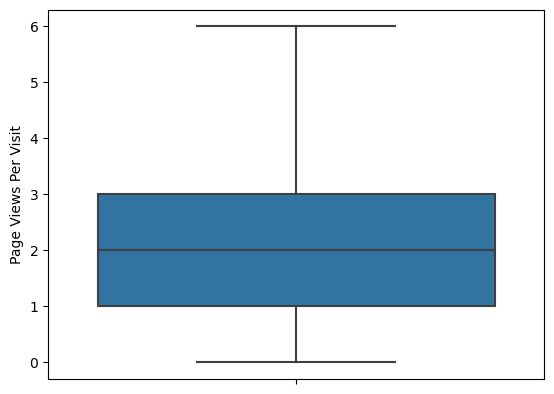

In [62]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = df2['Page Views Per Visit'].quantile([0.05,0.95]).values
df2['Page Views Per Visit'][df2['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df2['Page Views Per Visit'][df2['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=df2['Page Views Per Visit'])
plt.show()

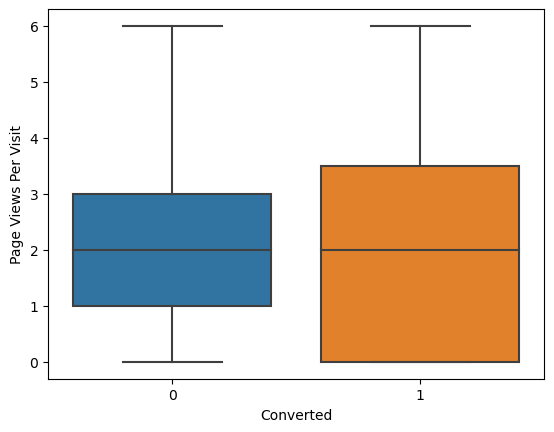

In [63]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df2)
plt.show()

Inference

Median for converted and not converted leads is almost same.
Nothing conclusive can be said on the basis of Page Views Per Visit.

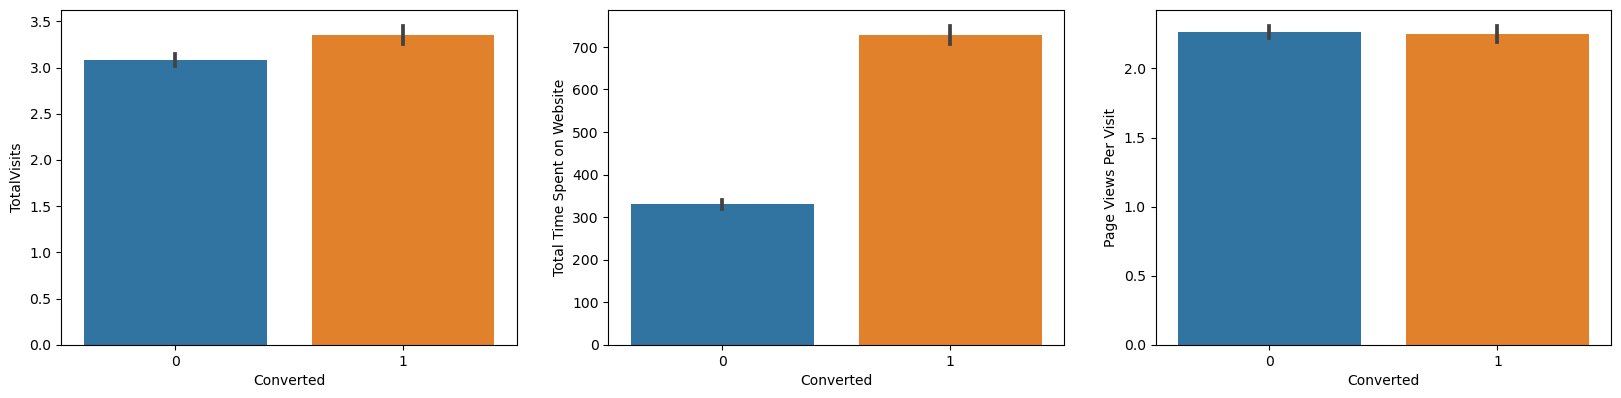

In [64]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = df2)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = df2)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = df2)
plt.show()

Inference

The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit

Now, all data labels are in good shape , we will proceed to our next step which is Data Preparation

# Data Preparation

# Converting Some Binary Variables

In [65]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df2[varlist] = df2[varlist].apply(binary_map)

In [66]:
df2.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 640.1+ KB


# Dummy Variable Creation

In [68]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(df2[['Lead Origin']], drop_first=True)
df2 = pd.concat([df2,dummy],1)



dummy = pd.get_dummies(df2['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
df2 = pd.concat([df2, dummy], axis = 1)


dummy = pd.get_dummies(df2['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Not provided'], 1)
df2 = pd.concat([df2, dummy], axis = 1)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8244\775653830.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df2 = pd.concat([df2,dummy],1)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8244\775653830.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy = dummy.drop(['Lead Source_Others'], 1)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8244\775653830.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy = dummy.drop(['What is your current occupation_Not provided'], 1)


KeyError: "['What is your current occupation_Not provided'] not found in axis"

In [ ]:
df2.drop(['Lead Origin', 'Lead Source', 'What is your current occupation'], 1, inplace=True)

In [ ]:
df2.head()

# Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variable to X
X=df2.drop('Converted', axis=1)

#checking head of X
X.head()

In [ ]:
# Putting response variable to y
y = df2['Converted']

#checking head of y
y.head()

In [ ]:
# Splitting the dataset into train and test set

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

In [ ]:
#lets check the coorelation matrix

plt.figure(figsize=(20,15))
sns.heatmap(df2.corr(), annot=True)
plt.show()

# Dropping Highly Coorelated Dummy Variables

In [ ]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

In [ ]:
X_train.info()

# Model Building using stats model and RFE 

In [ ]:
import statsmodels.api as sm

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 15)
rfe= rfe.fit(X_train, y_train)


In [ ]:
rfe.support_

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

# Model 1

In [ ]:
#Building Model 1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

p-value of variable What is your current occupation_Housewife is high, so we can drop it.

In [ ]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

# Model 2

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

p-value of variable "Lead Source_Welingak Website" is high, so we will drop it.

In [ ]:
#dropping column with high p-value

col = col.drop('Lead Source_Welingak Website',1)

# Model 3

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

variable 'What is your current occupation_Businessman' has high p-value, so it needs to be dropped

In [ ]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Businessman',1)

# Model 4

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

variable 'What is your current occupation_Other' has high p-value, so it needs to be dropped

In [ ]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Other',1)

# Model 5

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

Since the Model 5 seems to be stable with significant p-values, we shall go ahead with this model for further analysis

# Calculating VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

# Predicting a Train model

In [ ]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

# Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [ ]:
from sklearn import metrics

In [ ]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

In [ ]:
# Lets check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

# PLOTTING ROC CURVE

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC curve should be valued close to 1, We are getting a good value of 0.86 indicating a good predictive model.

# Finding Optimal Cutoff Point

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff)

In [ ]:
# plot accuracy, sensitivity and specificity for various probabilities.
cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the plot above, we can take 0.3 as the optimum point to take it as cutoff probability

In [ ]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

In [ ]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

In [ ]:
# checking if 80% cases are correctly predicted based on the converted column.

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

In [ ]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

# Hence, we can see that the final prediction of conversions have a target of 83% conversion as per the requirement .

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

Inference:
    
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:

-Accuracy : 77.05%

-Sensitivity :64.9%

-Specificity : 89.8%


# Precision and Recall

In [ ]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

In [ ]:
#Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

In [ ]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

In [ ]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

# Precision and Recall Trade-off

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Precicitions on the test set

In [ ]:
#scaling test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

In [ ]:
X_test = X_test[col]
X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
X_test_sm.shape

In [ ]:
y_test_pred = res.predict(X_test_sm) 

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [ ]:
y_pred_final.head()

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [ ]:
y_pred_final.head()

In [ ]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# checking if 80% cases are correctly predicted based on the converted column.

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

In [ ]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

# Hence we can see that the final prediction of conversions have a target rate of 83% (same as predictions made on training data set)

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

In [ ]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

Inference:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 77.52%
    
Sensitivity :64.9%
    
Specificity : 89.8%